In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(rc={'figure.figsize':(10,10)})
sns.set(style="whitegrid")

import numpy as np
import math
import scipy

from numpy import nan
from math import pi, e
phi = (1 + 5**0.5) / 2

from pprint import pprint
import colorsys


def simplify(X, Y):
    """Ignoring the extremely large values near asymptotes
    """
    r = np.absolute(np.max(X) - np.min(X)) / 2
    Y[np.absolute(Y) > r] = np.nan
    return X, Y


def linesplot(*args):
    """Plot list of lines
    args: sequence of pairs [X0,Y0], [X1,Y1]... or triples [X0, Y0, fmt0], [X1, Y1, fmt1]
    """
    plt.figure()
    for arg in args:
        X, Y = arg[:2]
        others_var = arg[2:]
        
        plt.plot(*simplify(X, Y), *others_var)
    plt.show()
    
    
def create_unique_color_float(tag, hue_step=0.41):
    """Create a unique RGB color code for a given track id (tag).

    The color code is generated in HSV color space by moving along the
    hue angle and gradually changing the saturation.

    Parameters
    ----------
    tag : int
        The unique target identifying tag.
    hue_step : float
        Difference between two neighboring color codes in HSV space (more
        specifically, the distance in hue channel).

    Returns
    -------
    (float, float, float)
        RGB color code in range [0, 1]

    """
    h, v = (tag * hue_step) % 1, 1. - (int(tag * hue_step) % 4) / 5.
    r, g, b = colorsys.hsv_to_rgb(h, 1., v)
    return r, g, b


def create_unique_color_uchar(tag, hue_step=0.41):
    """Create a unique RGB color code for a given track id (tag).

    The color code is generated in HSV color space by moving along the
    hue angle and gradually changing the saturation.

    Parameters
    ----------
    tag : int
        The unique target identifying tag.
    hue_step : float
        Difference between two neighboring color codes in HSV space (more
        specifically, the distance in hue channel).

    Returns
    -------
    (int, int, int)
        RGB color code in range [0, 255]

    """
    r, g, b = create_unique_color_float(tag, hue_step)
    return int(255*r), int(255*g), int(255*b)


<IPython.core.display.Javascript object>


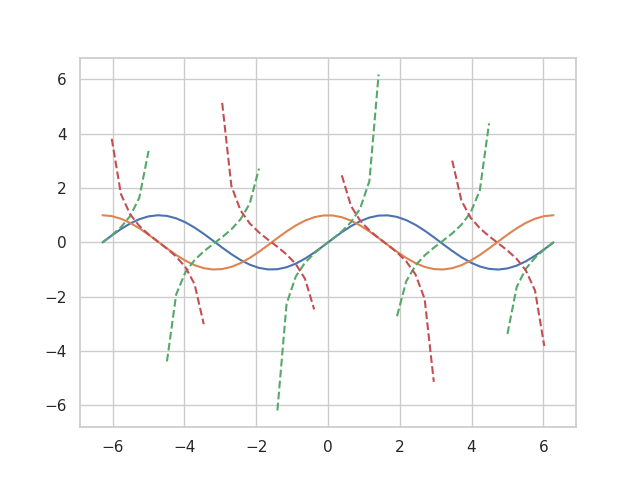

In [2]:
r = 2*pi
X = np.linspace(-r, r)

linesplot(
    [X, np.sin(X)],
    [X, np.cos(X)],
    [X, np.tan(X), '--'],
    [X, np.tan(X)**-1, '--']
)

/home/sontran/miniconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.
/home/sontran/miniconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in arcsin
  This is separate from the ipykernel package so we can avoid doing imports until
/home/sontran/miniconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in arccos
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


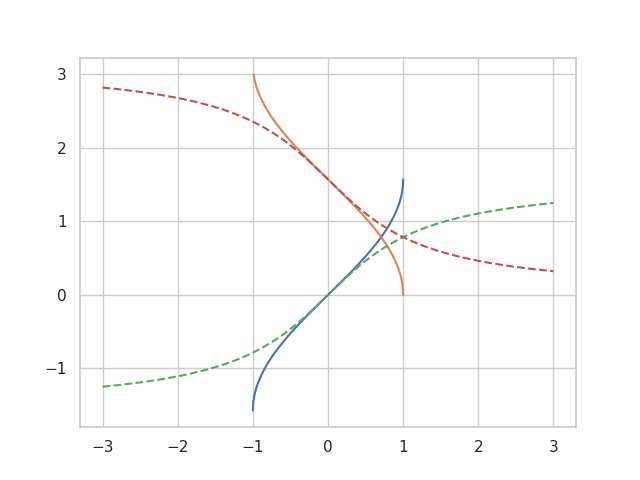

/home/sontran/miniconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater


In [4]:
X = np.linspace(-3, 3, 1e4)
linesplot(
    [X, np.arcsin(X)],
    [X, np.arccos(X)],
    [X, np.arctan(X), '--'],
    [X, pi / 2 - np.arctan(X), '--']
)

<IPython.core.display.Javascript object>


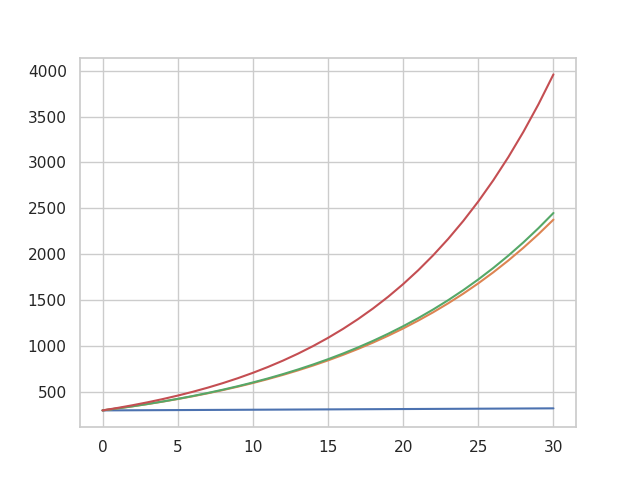

In [3]:
R = [0.0024, 0.069, 0.07, 0.086]
b = 300
T = np.arange(31)

plt.figure()
for r in R:
    G = b * np.exp(r * T)
#     print(r)
#     print(G, '\n')
    plt.plot(T, G)
plt.show()

<IPython.core.display.Javascript object>


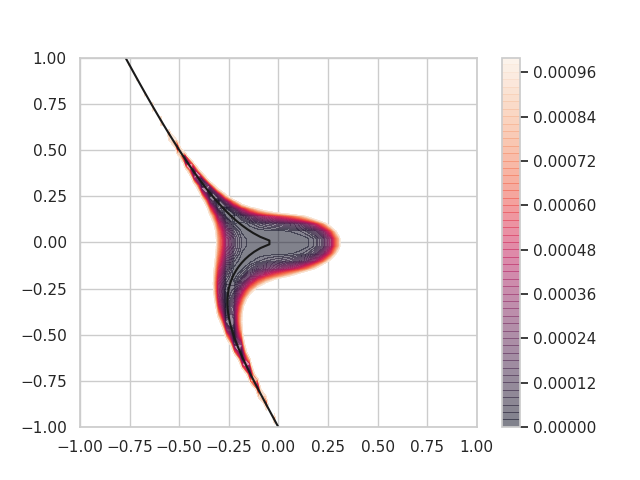

In [5]:
from scipy import optimize

f = lambda x, y: (x**3+y**3+y**2+2*x*y*y-0)**2
y_range = np.linspace(-1, 1, 100)
x_range = [optimize.fmin(f,0,args=(y,), disp=0) for y in y_range]
xr = np.linspace(-1,1)
yr = np.linspace(-1,1)
X, Y = np.meshgrid(xr, yr)
Z = f(X, Y)
plt.figure()
plt.plot(x_range, y_range, 'k')
plt.contourf(xr, yr, Z, levels=np.linspace(0,0.001,51), alpha=0.5)
plt.colorbar()

<IPython.core.display.Javascript object>


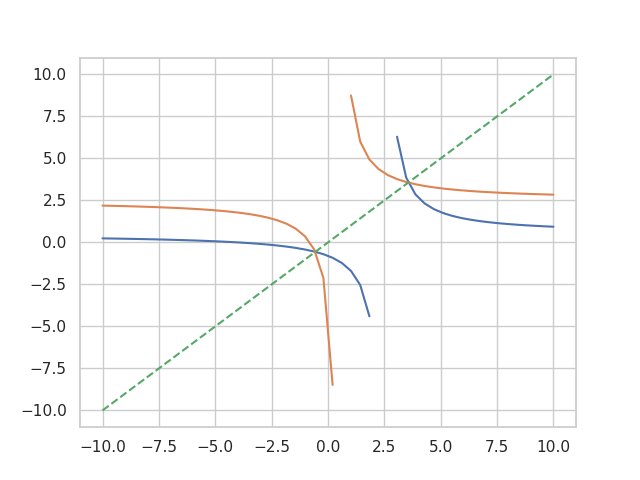

In [6]:
h = lambda x: (x + 4) / (2*x -5)
h_inverse = lambda x: (4 + 5*x) / (2*x -1)

X = np.linspace(-10, 10)
Y = h(X)
Y_inverse = h_inverse(X)

linesplot(
    [X, Y],
    [X, Y_inverse],
    [X, X, '--']
)

<IPython.core.display.Javascript object>


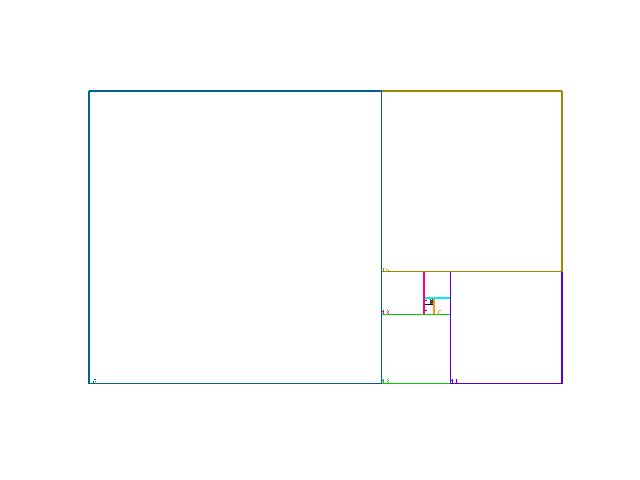

In [31]:
# Fibonacci spiral
import cv2 as cv

# Directions matrix for calculating new top-left
# [[['k-1' related], ['k' related]], ...]
D = np.array([
    [[0, 0], [-1, 0]], # left
    [[0, 1], [ 0, 0]], # down
    [[1, 0], [ 0, 0]], # right
    [[0, 0], [ 0,-1]]  # up
])

# Calculate Fibonacci sequence
n = 16
M = [None] * (n + 1)
M[0], M[1] = 0, 1
for k in range(2, n + 1):
    M[k] = M[k-1] + M[k-2]

# Background
size = np.array((M[n] + M[n-1], M[n])) * 2
start = size // 2
bg = np.full((size[1],size[0],3), 255, np.uint8)

# Style
fontFace = cv.FONT_HERSHEY_COMPLEX_SMALL
fontScale = 1
thickness = 3

# 1st rect
k = 1
tl = start
tl_prev = tl
br = tl + M[k]

color = create_unique_color_uchar(k)
cv.rectangle(bg, tuple(tl), tuple(br), color, thickness)
cv.putText(bg, str(k), (tl[0],br[1]), fontFace, fontScale, color)

# Other rects
for k in range(2, n + 1):    
    tl = (
        tl_prev + 
        [M[k-1], M[k-1]] * D[k%4][0] + 
        [M[k], M[k]] * D[k%4][1]
    )
    tl_prev = tl_prev if sum(tl_prev) < sum(tl) else tl
    br = tl + M[k]
    
    color = create_unique_color_uchar(k)
    cv.rectangle(bg, tuple(tl), tuple(br), color, thickness)
    cv.putText(bg, str(k), (tl[0],br[1]), fontFace, fontScale, color)
    
    
plt.figure()
plt.imshow(bg)
plt.axis(False)
plt.show()

In [14]:
a = np.array([12,10])
sum(a)

22